In [1]:
%pip install seaborn

0
361
419
460
537
     Semana  Porcentaje
0  Semana 1      100.00
1   Semana2       13.84
2  Semana 3        8.91
3  Semana 4       14.34


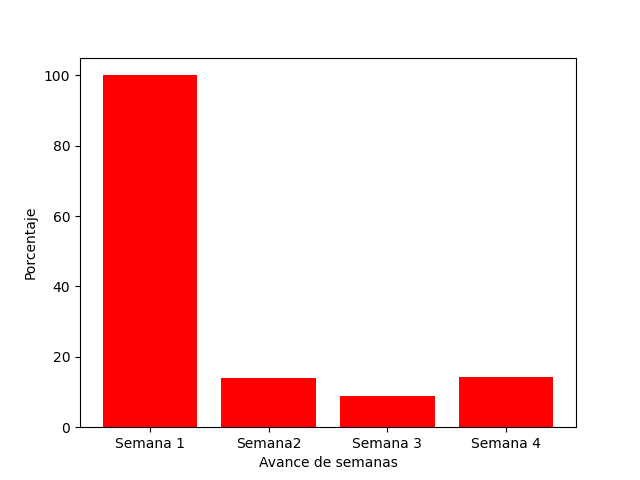

In [149]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 

####
#
# Pregunta 1
#

#Se leen los archivos para sacar la información
hoja1 = pd.read_csv('Qatar2022.csv')
# Se consiguen los encabezados de cada columna
header = hoja1.columns.values
hoja2 = pd.read_csv('Qatar2022-221029.csv')
hoja3 = pd.read_csv('Qatar2022-221031.csv')
hoja4 = pd.read_csv('Qatar2022-221104.csv')
hoja5 = pd.read_csv('Qatar2022-221107.csv')

total1 = 0
total2 = 0
total3 = 0
total4 = 0
total5 = 0

# Ciclos para obtener la cantidad todal de psotales obtenidas cada semana
# Se revisa la cantidad de filas
for i in range (0, 32):
    # Se revisa las columnas con postales
    for j in range(2, len(header)):
        # j es la columna a revisar
        # i es la fila a revisar
        total1 += hoja1[header[j]][i]
print(total1)

# Igual que el anterior pero con otro archivo
for i in range (0, 32):
    for j in range(2, len(header)):
        total2 += hoja2[header[j]][i]
print(total2)

# Igual que el anterior pero con otro archivo
for i in range (0, 32):
    for j in range(2, len(header)):
        total3 += hoja3[header[j]][i]
print(total3)

# Igual que el anterior pero con otro archivo
for i in range (0, 32):
    for j in range(2, len(header)):
        total4 += hoja4[header[j]][i]
print(total4)

# Igual que el anterior pero con otro archivo
for i in range (0, 32):
    for j in range(2, len(header)):
        total5 += hoja5[header[j]][i]
print(total5)

semana1 = round(100 - total1*100/(total2), 2)
semana2 = round(100 - total2*100/(total3), 2)
semana3 = round(100 - total3*100/(total4), 2)
semana4 = round(100 - total4*100/(total5), 2)

hoja1 = pd.read_csv('Qatar2022.csv')
header1 = hoja1.columns.values
hoja2 = pd.read_csv('Qatar2022-221107.csv')
header2 = hoja2.columns.values

#####
#
# Gráfico pregunta 1
# ¿Cuántas postales han sido obtenidas en las últimas n semanas?, Cuál es la distribución porcentual por semana?

# Se crea el nuevo dataframe para poder crear el gráfico de barras con las semanas y datos totales obtenidos
data = {'Semana':['Semana 1', 'Semana2', 'Semana 3', 'Semana 4'], 'Porcentaje':[semana1, semana2, semana3, semana4]}
pregunta1 = pd.DataFrame(data)
print(pregunta1)

# Se ingresan las columnas a conseguir información de los ejes "x" y "y" 
plt.bar("Semana", "Porcentaje", data = pregunta1, color = "red")
# Se establecen los nuevos rótulos de los ejes
plt.xlabel("Avance de semanas")
plt.ylabel("Porcentaje")
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

In [78]:
####
#
# Lógica de las preguntas 2 - 5
#

# Función para conseguir todas las postales del último csv con las postales obtenidas
postales = [] # Lista inicial para guardar los resultados
for i in range(0, 32):
    sumaActual=0 # Contador de la suma actual de la sección
    postales += [[hoja2[header2[0]][i]]] # Se ingresa la sección al cual pertenece la fila
    for j in range(2,len(header2)):
        # Se ingresa el valor de la columna
        sumaActual += hoja2[header2[j]][i]
    # Se almmacena el valor para cambiar de fila
    postales[len(postales)-1].append(sumaActual)

# Función para ordenar de mayor a menor las postales conseguidas previamente
# Primer recorrido de la lista postales
for i in range(len(postales)):
    # Segundo recorrido para verificar
    for j in range(i + 1, len(postales)):
        # Cambio el orden de las postales si una es mayor que la otra
        if postales[i][1] < postales[j][1]:
            # Cambian el orden en la que se encuentran
            postales[i],postales[j]=postales[j],postales[i]

# Top 5 mayor cantidad de postales 
top5 = postales[:5]
# Top 5 menor cantidad de postales
min5 = postales[len(postales)-5:]
print("Top 5 grupos con mayor cantidad: ", top5)
print("Top 5 grupos con menor cantidad: ", min5)

# Función para conseguir todas las postales repetidas del último csv con las postales obtenidas
postalesRepetidas = [] # Lista inicial para guardar los resultados
for i in range (0, 32):
    totalRepetidas = 0 # Contador de la suma actual repetidas de la sección
    postalesRepetidas += [[hoja2[header2[0]][i]]]
    for j in range(2, len(header)):
        if hoja2[header[j]][i] > 1:
            # Se ingresa el valor de la columna -1 por ser repetida (no cuenta la primera postal obtenida)
            totalRepetidas += hoja2[header[j]][i] - 1 
    # Se almmacena el valor para cambiar de fila
    postalesRepetidas[len(postalesRepetidas)-1].append(totalRepetidas)

# Misma función para ordenarlas
# Primer recorrido de la lista postales
for i in range(len(postalesRepetidas)):
    # Segundo recorrido para verificar
    for j in range(i + 1, len(postalesRepetidas)):
        # Cambio el orden de las postales si una es mayor que la otra
        if postalesRepetidas[i][1] < postalesRepetidas[j][1]:
            # Cambian el orden en la que se encuentran
            postalesRepetidas[i],postalesRepetidas[j] = postalesRepetidas[j],postalesRepetidas[i]

# Top 5 mayor cantidad de postales repetidas
top5Rep = postalesRepetidas[:5]
# Top 5 menor cantidad de postales repetidas
min5Rep = postalesRepetidas[len(postalesRepetidas)-5:]
print("Top 5 grupos con mayor cantidad repetida: ", top5Rep)
print("Top 5 grupos con mayor cantidad repetida: ", min5Rep)

Top 5 grupos con mayor cantidad:  [['JPN', 27], ['SEN', 26], ['ECU', 26], ['QAT', 24], ['KSA', 21]]
Top 5 grupos con menor cantidad:  [['SUI', 11], ['URU', 11], ['MAR', 11], ['POR', 9], ['BRA', 9]]
Top 5 grupos con mayor cantidad repetida:  [['JPN', 13], ['ECU', 12], ['SEN', 10], ['KSA', 8], ['CRC', 8]]
Top 5 grupos con mayor cantidad repetida:  [['BEL', 2], ['URU', 2], ['BRA', 2], ['POR', 1], ['SUI', 1]]


  País  Cantidad
0  JPN        27
1  SEN        26
2  ECU        26
3  QAT        24
4  KSA        21


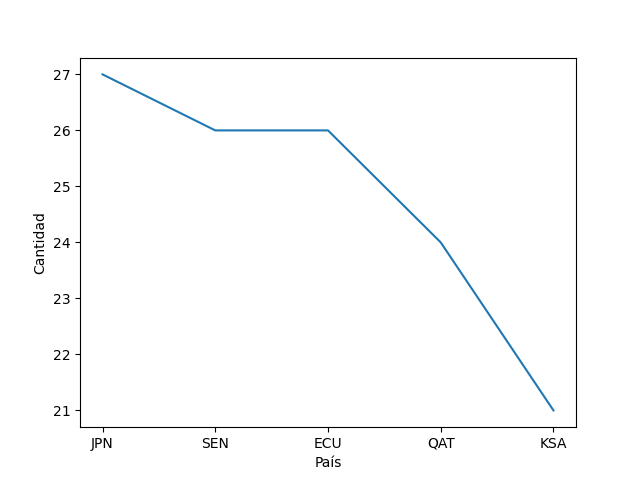

In [147]:
#####
#
# Gráfico pregunta 2
# ¿Cuáles son las 5 secciones que presentan mayor cantidad de postales?, por grupo?
seccion = [] # Lista del país 
cantidad = [] # Lista de los resultados obtenidos previamente
# Iteración para separar los datos de los resultados obtenidos
for i in top5:
    seccion += [i[0]]
    cantidad += [i[1]] 
# Se preparan los datos para crear el gráfico
data = {'País':seccion, 'Cantidad':cantidad}
pregunta2 = pd.DataFrame(data)
print(pregunta2)
sns.lineplot(x = "País", y = "Cantidad", data=pregunta2)
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Cantidad
0  SUI        11
1  URU        11
2  MAR        11
3  POR         9
4  BRA         9


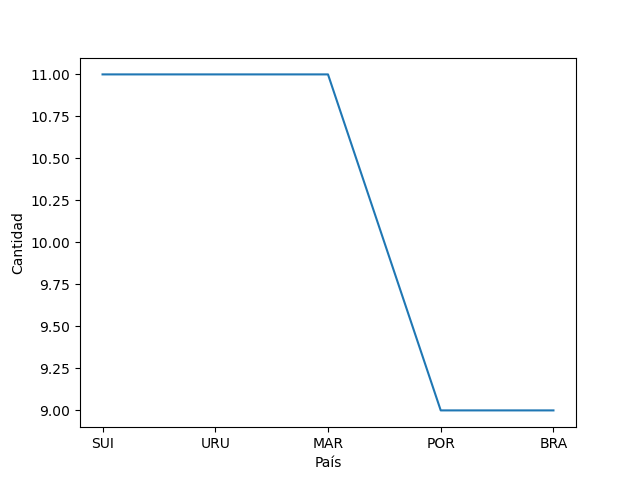

In [146]:
#####
#
# Gráfico pregunta 3
# ¿Cuáles son las 5 secciones que presentan menor cantidad de postales?, por grupo?
seccion = [] # Lista del país 
cantidad = [] # Lista de los resultados obtenidos previamente
# Iteración para separar los datos de los resultados obtenidos
for i in min5:
    seccion += [i[0]]
    cantidad += [i[1]] 
# Se preparan los datos para crear el gráfico
data = {'País':seccion, 'Cantidad':cantidad}
pregunta3 = pd.DataFrame(data)
print(pregunta3)
sns.lineplot(x = "País", y = "Cantidad", data=pregunta3)
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Cantidad
0  JPN        13
1  ECU        12
2  SEN        10
3  KSA         8
4  CRC         8


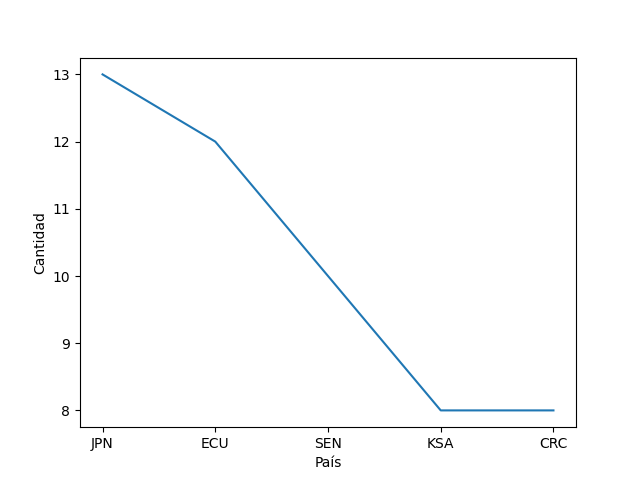

In [145]:
#####
#
# Gráfico pregunta 4
#  ¿Cuáles son las 5 secciones que presentan mayor cantidad total de postales repetidas?, por grupo?
seccion = [] # Lista del país 
cantidad = [] # Lista de los resultados obtenidos previamente
# Iteración para separar los datos de los resultados obtenidos
for i in top5Rep:
    seccion += [i[0]]
    cantidad += [i[1]] 
# Se preparan los datos para crear el gráfico
data = {'País':seccion, 'Cantidad':cantidad}
pregunta4 = pd.DataFrame(data)
print(pregunta4)
sns.lineplot(x = "País", y = "Cantidad", data=pregunta4)
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Cantidad
0  BEL         2
1  URU         2
2  BRA         2
3  POR         1
4  SUI         1


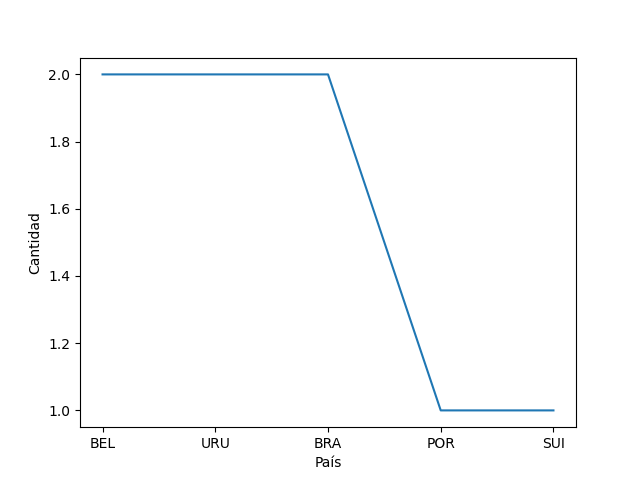

In [144]:
#####
#
# Gráfico pregunta 5
# ¿Cuáles son las 5 secciones que presentan menor cantidad total de postales repetidas?, por grupo?
seccion = [] # Lista del país 
cantidad = [] # Lista de los resultados obtenidos previamente
# Iteración para separar los datos de los resultados obtenidos
for i in min5Rep:
    seccion += [i[0]]
    cantidad += [i[1]] 
# Se preparan los datos para crear el gráfico
data = {'País':seccion, 'Cantidad':cantidad}
pregunta5 = pd.DataFrame(data)
print(pregunta5)
sns.lineplot(x = "País", y = "Cantidad", data=pregunta5)
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

In [110]:
# #
# Lógica de las preguntas 6 - 10
#

# 7
distribucion = [] # Lista para guardar los resultados
for i in range (0, 32):
    # Conteo de los datos obtenidos
    tengo = 0
    noTengo = 0
    repetido = 0
    distribucion += [[hoja2[header2[0]][i], hoja2[header2[1]][i]]] # Separador del seccion perteneciente de los datos
    for j in range(2, len(header)):
        if hoja2[header[j]][i] == 1: # +1 si lo tiene
            tengo += 1 
        if hoja2[header[j]][i] == 0: # +1 si no lo tiene
            noTengo += 1
        if hoja2[header[j]][i] > 1: # +1 si tiene más de uno
            repetido += 1 
    # Almacenamiento de datos para el cambio de fila
    distribucion[len(distribucion)-1].append(tengo)
    distribucion[len(distribucion)-1].append(noTengo)
    distribucion[len(distribucion)-1].append(repetido)

#6 
# Iteracion para conseguir la cantidad de tengo, no tengo y repetidas para modificar de cada grupo
gruposPorcentuales = [['A',0,0,0],['B',0,0,0],['C',0,0,0],['D',0,0,0],['E',0,0,0],['F',0,0,0],['G',0,0,0],['H',0,0,0]]
for i in distribucion:
    if i[1] == 'A':
        gruposPorcentuales[0][1] += i[2]
        gruposPorcentuales[0][2] += i[3]
        gruposPorcentuales[0][3] += i[4]
    if i[1] == 'B':
        gruposPorcentuales[1][1] += i[2]
        gruposPorcentuales[1][2] += i[3]
        gruposPorcentuales[1][3] += i[4]
    if i[1] == 'C':
        gruposPorcentuales[2][1] += i[2]
        gruposPorcentuales[2][2] += i[3]
        gruposPorcentuales[2][3] += i[4]
    if i[1] == 'D':
        gruposPorcentuales[3][1] += i[2]
        gruposPorcentuales[3][2] += i[3]
        gruposPorcentuales[3][3] += i[4]
    if i[1] == 'E':
        gruposPorcentuales[4][1] += i[2]
        gruposPorcentuales[4][2] += i[3]
        gruposPorcentuales[4][3] += i[4]
    if i[1] == 'F':
        gruposPorcentuales[5][1] += i[2]
        gruposPorcentuales[5][2] += i[3]
        gruposPorcentuales[5][3] += i[4]
    if i[1] == 'G':
        gruposPorcentuales[6][1] += i[2]
        gruposPorcentuales[6][2] += i[3]
        gruposPorcentuales[6][3] += i[4]
    if i[1] == 'H':
        gruposPorcentuales[7][1] += i[2]
        gruposPorcentuales[7][2] += i[3]
        gruposPorcentuales[7][3] += i[4]

# Iteracion para conseguir el total de tengo, no tengo y repetida de cada grupo
gruposPorcentualesTotales = [0,0,0]
for i in gruposPorcentuales:
    gruposPorcentualesTotales[0] += i[1]
    gruposPorcentualesTotales[1] += i[2]
    gruposPorcentualesTotales[2] += i[3]

# Iteracion para conseguir los procentajes de tengo, no tengo y repetidas de cada grupo
for i in gruposPorcentuales:
    i[1] = round(100*i[1]/gruposPorcentualesTotales[0],2)
    i[2] = round(100*i[2]/gruposPorcentualesTotales[1],2)
    i[3] = round(100*i[3]/gruposPorcentualesTotales[2],2)

# Iteracion para convertir la cantidad de tengo, no tengo y repetidas de cada seccion en porcentaje 
for i in distribucion:
    i[2] = round(i[2]*100/19, 2)
    i[3] = round(i[3]*100/19, 2)
    i[4] = round(i[4]*100/19, 2)

#8
escudos = [] # Lista para guardar los resultados
totalRepetidos = 0 # Contador de postales totales
for i in range (0, 32):
    # Conteo de los datos obtenidos
    tengo = 0
    noTengo = 0
    repetido = 0
    escudos += [[hoja2[header2[0]][i], hoja2[header2[1]][i]]] # Separador del grupo y seccion perteneciente de los datos
    if hoja2[header[2]][i] == 1:
        tengo += 1 
    if hoja2[header[2]][i] == 0:
        noTengo += 1
    if hoja2[header[2]][i] > 1:
        totalRepetidos += 1
        repetido += 1 
        tengo += 1
    
    # Almacenamiento de datos para el cambio de fila
    escudos[len(escudos)-1].append(tengo)
    escudos[len(escudos)-1].append(noTengo)
    escudos[len(escudos)-1].append(repetido)

# Iteracion para sacar los porcentajes de los escudos
for i in escudos:
    i[2] = round(i[2]*100/32, 2)
    i[3] = round(i[3]*100/32, 2)
    i[4] = round(i[4]*100/totalRepetidos, 2)

# 9
porteros = [] # Lista para guardar los resultados
totalPorteros = 0 # Contador de porteros totales
for i in range (0, 32):
    # Conteo de los datos obtenidos
    tengo = 0
    noTengo = 0
    repetido = 0
    porteros += [[hoja2[header2[0]][i], hoja2[header2[1]][i]]] # Separador del grupo perteneciente de los datos
    if hoja2[header[3]][i] == 1:
        tengo += 1 
    if hoja2[header[3]][i] == 0:
        noTengo += 1
    if hoja2[header[3]][i] > 1:
        tengo += 1
        repetido += 1
        totalPorteros += 1
    if hoja2[header[4]][i] == 1:
        tengo += 1 
    if hoja2[header[4]][i] == 0:
        noTengo += 1
    if hoja2[header[4]][i] > 1:
        tengo += 1
        repetido += 1 
        totalPorteros += 1
    # Almacenamiento de datos para el cambio de fila
    porteros[len(porteros)-1].append(tengo)
    porteros[len(porteros)-1].append(noTengo)
    porteros[len(porteros)-1].append(repetido)

for i in porteros:
    i[2] = round(i[2]*100/32, 2)
    i[3] = round(i[3]*100/32, 2)
    i[4] = round(i[4]*100/totalPorteros, 2)

#10
jugadores = [0,0,0,0,0] # Lista para modificar si se encontró o no
# Se busca por fila y columna si se posee el jugador 
for i in range (0, 32):
    for j in range(2, len(header)):
        # Lionel Messi
        if hoja2[header[20]][8] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[0] = 1
        # Cristiano Ronaldo
        if hoja2[header[18]][28] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[1] = 1
        # Mbappe
        if hoja2[header[19]][12] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[2] = 1
        # Karim Benzema
        if hoja2[header[16]][12] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[3] = 1
        # Neymar
        if hoja2[header[17]][24] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[4] = 1

  Grupo  Tengo  No tengo  Repetida
0     A  13.25      6.75     21.17
1     B  11.97     12.66     13.14
2     C  11.54     13.50     12.41
3     D  14.10     11.81     10.95
4     E  12.39     10.97     15.33
5     F  11.11     15.19     10.22
6     G  12.82     14.77      8.03
7     H  12.82     14.35      8.76


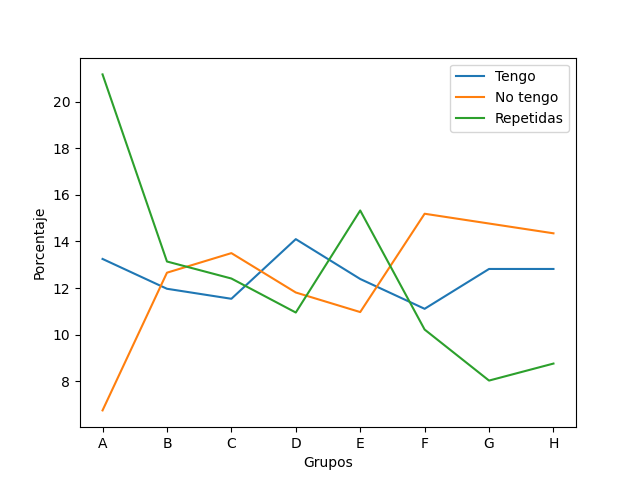

In [150]:
####
#
# Preguntas 6
# ¿Cual es la distribución porcentual de postales (la tengo, no la tengo, la tengo repetida) para un grupo dado?. Se debe leer el grupo.
# 

grupos = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in gruposPorcentuales:
    grupos += [i[0]]
    distribucionTengo += [i[1]]
    distribucionNoTengo += [i[2]]
    distribucionRepetido += [i[3]]

data = {'Grupo':grupos, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta6 = pd.DataFrame(data)
print(pregunta6)

sns.lineplot(x = "Grupo", y = "Tengo", data=pregunta6, label = "Tengo")
sns.lineplot(x = "Grupo", y = "No tengo", data=pregunta6, label = "No tengo")
sns.lineplot(x = "Grupo", y = "Repetida", data=pregunta6, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupos")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  QAT  57.89     10.53     31.58
1  ECU  21.05     26.32     52.63
2  SEN  47.37     15.79     36.84
3  NED  36.84     31.58     31.58


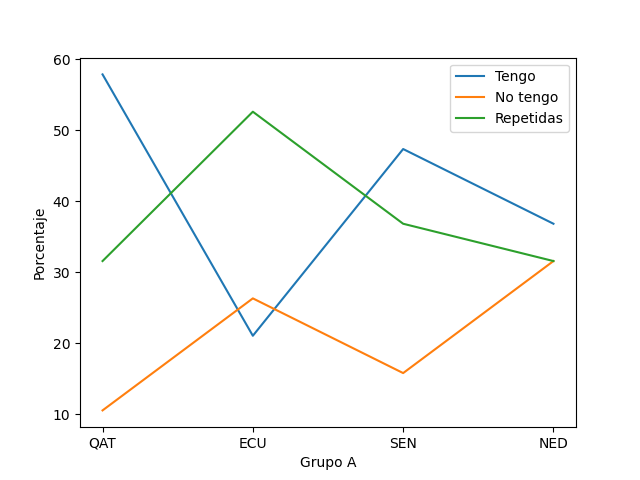

In [141]:
####
#
# Preguntas 7.1 = Grupo A
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'A':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_1 = pd.DataFrame(data)
print(pregunta7_1)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_1, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_1, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_1, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo A")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ENG  26.32     36.84     36.84
1  IRN  31.58     42.11     26.32
2  USA  47.37     36.84     15.79
3  WAL  42.11     42.11     15.79


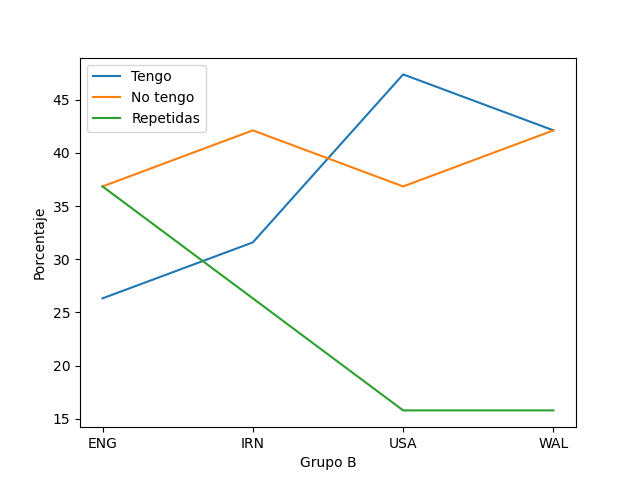

In [140]:
####
#
# Preguntas 7.2 = Grupo B
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'B':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_2 = pd.DataFrame(data)
print(pregunta7_2)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_2, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_2, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_2, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo B")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ARG  36.84     47.37     15.79
1  KSA  36.84     31.58     31.58
2  MEX  26.32     47.37     26.32
3  POL  42.11     42.11     15.79


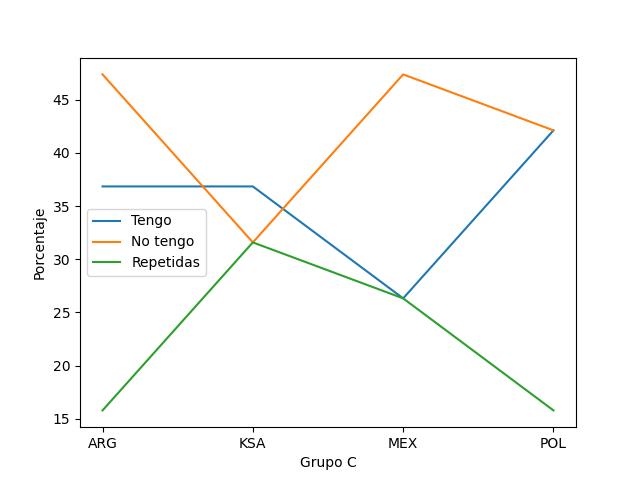

In [151]:
####
#
# Preguntas 7.3 = Grupo C
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'C':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_3 = pd.DataFrame(data)
print(pregunta7_3)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_3, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_3, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_3, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo C")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  FRA  57.89     26.32     15.79
1  AUS  47.37     26.32     26.32
2  DEN  36.84     47.37     15.79
3  TUN  31.58     47.37     21.05


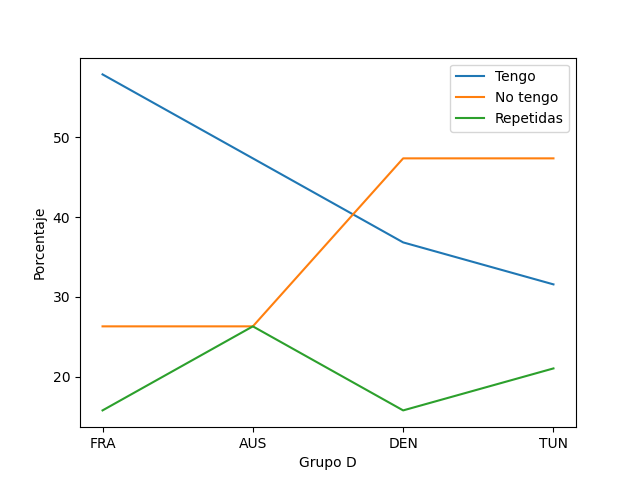

In [139]:
####
#
# Preguntas 7.4 = Grupo D
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'D':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_4 = pd.DataFrame(data)
print(pregunta7_4)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_4, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_4, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_4, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo D")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ESP  36.84     36.84     26.32
1  CRC  31.58     36.84     31.58
2  GER  52.63     36.84     10.53
3  JPN  31.58     26.32     42.11


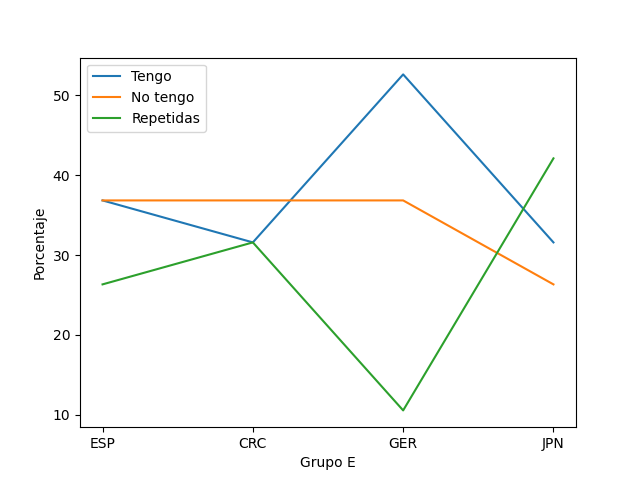

In [138]:
####
#
# Preguntas 7.5 = Grupo E
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'E':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_5 = pd.DataFrame(data)
print(pregunta7_5)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_5, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_5, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_5, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo E")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  BEL  42.11     47.37     10.53
1  CAN  21.05     52.63     26.32
2  MAR  36.84     52.63     10.53
3  CRO  36.84     36.84     26.32


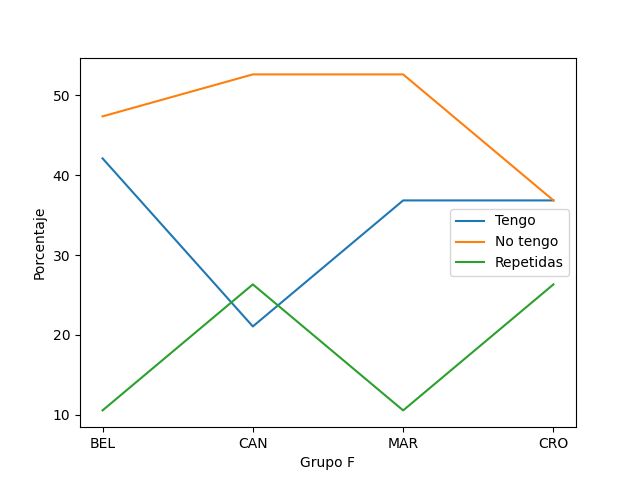

In [137]:
####
#
# Preguntas 7.6 = Grupo F
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'F':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_6 = pd.DataFrame(data)
print(pregunta7_6)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_6, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_6, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_6, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo F")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  BRA  26.32     63.16     10.53
1  SRB  42.11     36.84     21.05
2  SUI  47.37     47.37      5.26
3  CMR  42.11     36.84     21.05


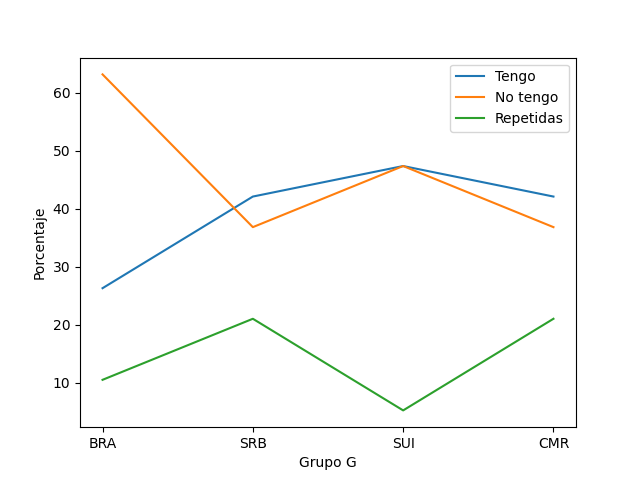

In [136]:
####
#
# Preguntas 7.7 = Grupo G
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'G':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_7 = pd.DataFrame(data)
print(pregunta7_7)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_7, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_7, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_7, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo G")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  POR  36.84     57.89      5.26
1  GHA  42.11     36.84     21.05
2  URU  36.84     52.63     10.53
3  KOR  42.11     31.58     26.32


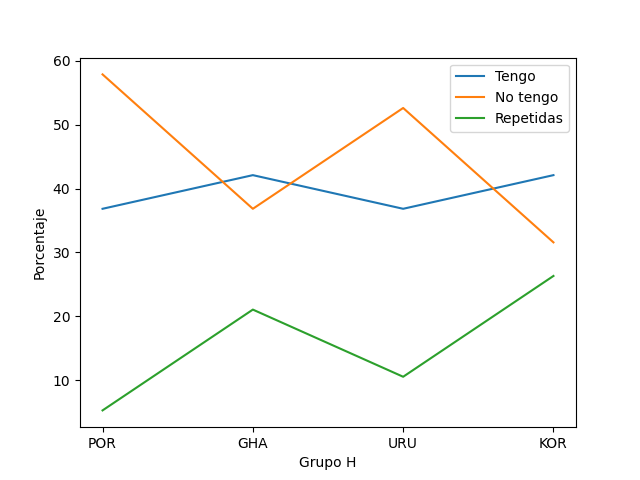

In [135]:
####
#
# Preguntas 7.8 = Grupo H
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'H':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_8 = pd.DataFrame(data)
print(pregunta7_8)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_8, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_8, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_8, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo H")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  QAT   3.12       0.0      0.00
1  ECU   3.12       0.0     16.67
2  SEN   3.12       0.0      0.00
3  NED   3.12       0.0      0.00


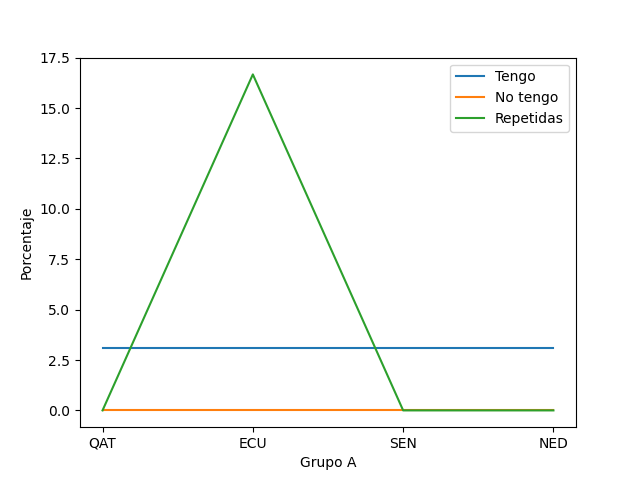

In [134]:
####
#
# Preguntas 8.1 = Grupo A
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'A':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_1 = pd.DataFrame(data)
print(pregunta8_1)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_1, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_1, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_1, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo A")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ENG   3.12      0.00     16.67
1  IRN   0.00      3.12      0.00
2  USA   3.12      0.00      0.00
3  WAL   0.00      3.12      0.00


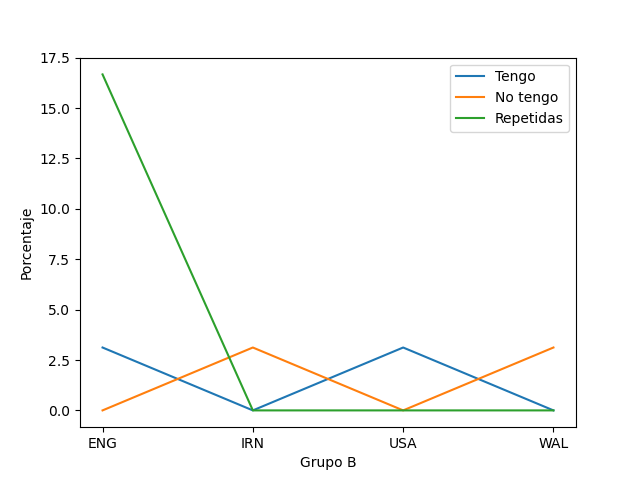

In [133]:
####
#
# Preguntas 8.2 Grupo B
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'B':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_2= pd.DataFrame(data)
print(pregunta8_2)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_2, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_2, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_2, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo B")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ARG   3.12      0.00      0.00
1  KSA   3.12      0.00     16.67
2  MEX   0.00      3.12      0.00
3  POL   0.00      3.12      0.00


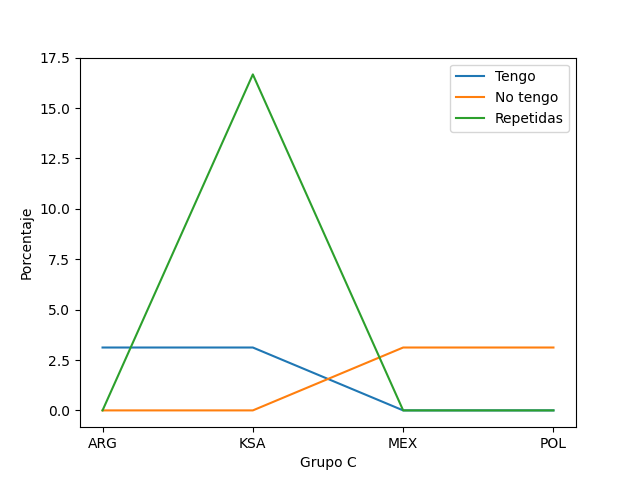

In [132]:
####
#
# Preguntas 8.3 Grupo C
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'C':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_3= pd.DataFrame(data)
print(pregunta8_3)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_3, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_3, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_3, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo C")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  FRA   0.00      3.12       0.0
1  AUS   3.12      0.00       0.0
2  DEN   3.12      0.00       0.0
3  TUN   0.00      3.12       0.0


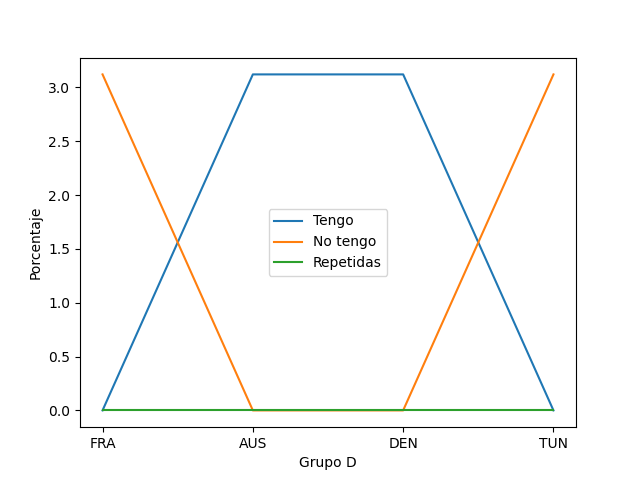

In [131]:
####
#
# Preguntas 8.4 Grupo D
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'D':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_4= pd.DataFrame(data)
print(pregunta8_4)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_4, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_4, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_4, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo D")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ESP   3.12      0.00      0.00
1  CRC   0.00      3.12      0.00
2  GER   3.12      0.00     16.67
3  JPN   3.12      0.00      0.00


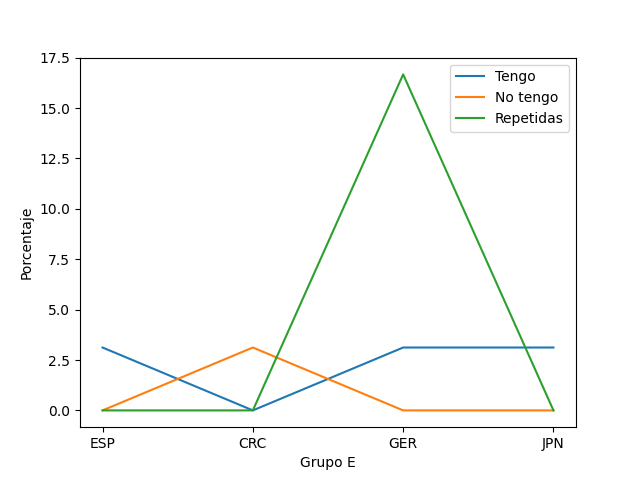

In [130]:
####
#
# Preguntas 8.5 Grupo E
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'E':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_5= pd.DataFrame(data)
print(pregunta8_5)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_5, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_5, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_5, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo E")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  BEL   0.00      3.12      0.00
1  CAN   3.12      0.00     16.67
2  MAR   3.12      0.00      0.00
3  CRO   0.00      3.12      0.00


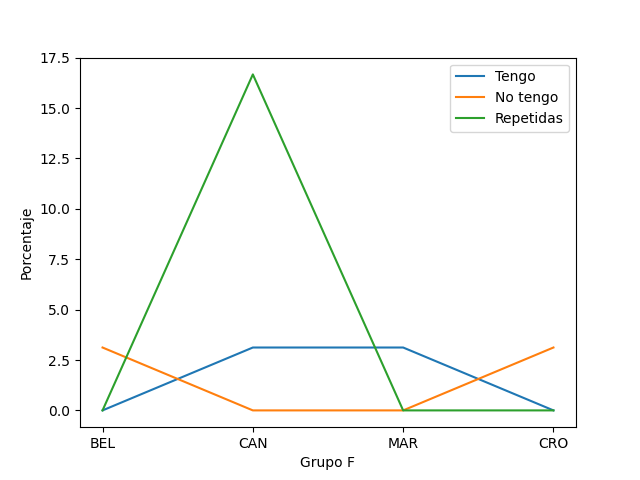

In [129]:
####
#
# Preguntas 8.6 Grupo F
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'F':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_6= pd.DataFrame(data)
print(pregunta8_6)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_6, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_6, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_6, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo F")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  BRA   3.12      0.00     16.67
1  SRB   0.00      3.12      0.00
2  SUI   0.00      3.12      0.00
3  CMR   3.12      0.00      0.00


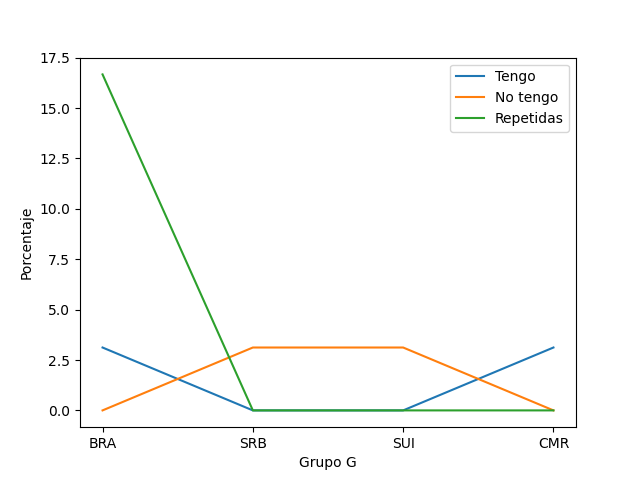

In [128]:
####
#
# Preguntas 8.7 Grupo G
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'G':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_7= pd.DataFrame(data)
print(pregunta8_7)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_7, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_7, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_7, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo G")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  POR   0.00      3.12       0.0
1  GHA   3.12      0.00       0.0
2  URU   0.00      3.12       0.0
3  KOR   3.12      0.00       0.0


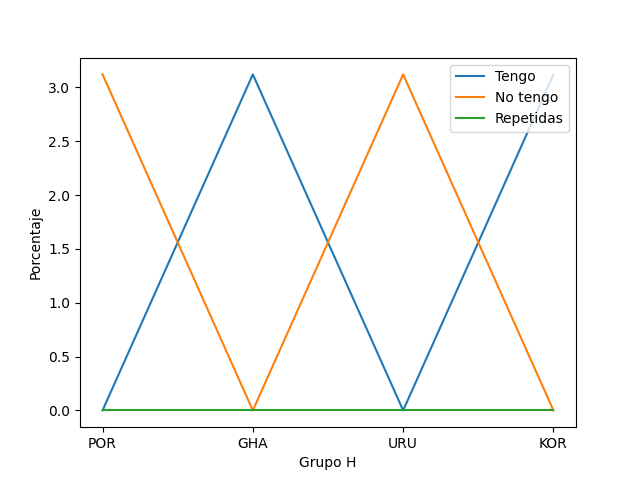

In [127]:
####
#
# Preguntas 8.8 Grupo H
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'H':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_8= pd.DataFrame(data)
print(pregunta8_8)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_8, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_8, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_8, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo H")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  QAT   3.12       0.0      0.00
1  ECU   3.12       0.0     16.67
2  SEN   3.12       0.0      0.00
3  NED   3.12       0.0      0.00


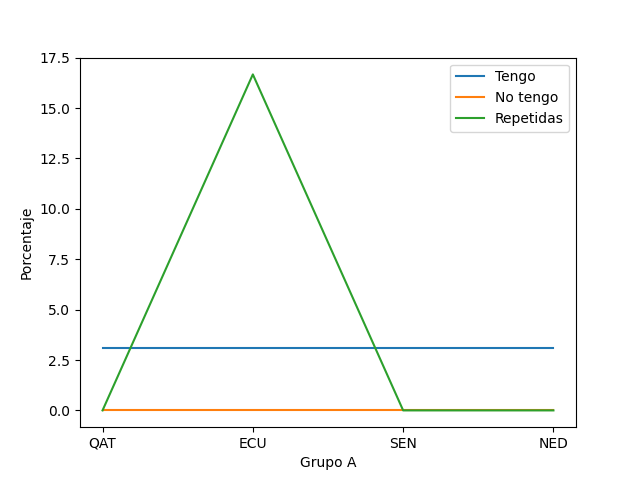

In [112]:
####
#
# Preguntas 9.1 Grupo A
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'A':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_1= pd.DataFrame(data)
print(pregunta9_1)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_1, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_1, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_1, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo A")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ENG   3.12      0.00     16.67
1  IRN   0.00      3.12      0.00
2  USA   3.12      0.00      0.00
3  WAL   0.00      3.12      0.00


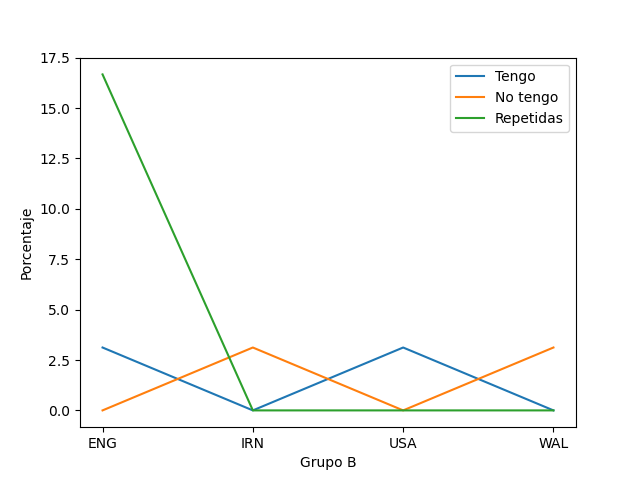

In [114]:
####
#
# Preguntas 9.2 Grupo B
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'B':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_2= pd.DataFrame(data)
print(pregunta9_2)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_2, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_2, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_2, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo B")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ARG   3.12      0.00      0.00
1  KSA   3.12      0.00     16.67
2  MEX   0.00      3.12      0.00
3  POL   0.00      3.12      0.00


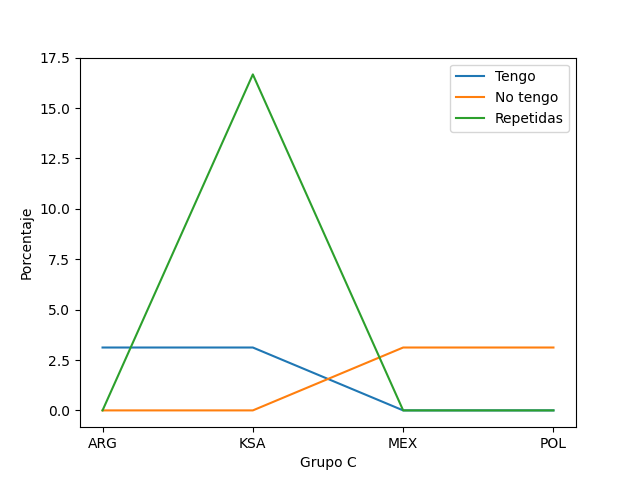

In [116]:
####
#
# Preguntas 9.3 Grupo C
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'C':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_3= pd.DataFrame(data)
print(pregunta9_3)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_3, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_3, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_3, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo C")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  FRA   0.00      3.12       0.0
1  AUS   3.12      0.00       0.0
2  DEN   3.12      0.00       0.0
3  TUN   0.00      3.12       0.0


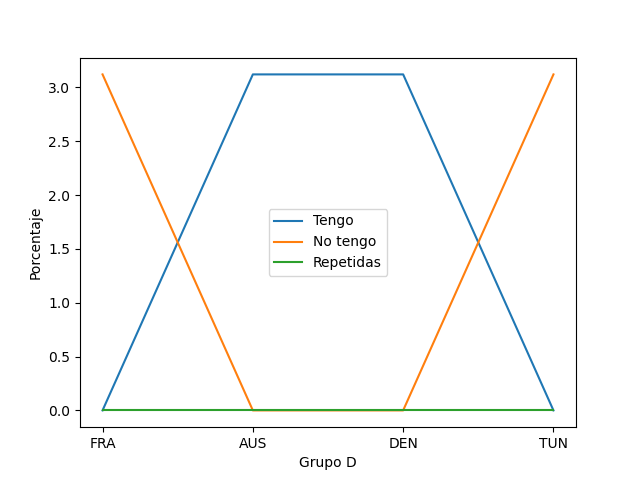

In [118]:
####
#
# Preguntas 9.4 Grupo D
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'D':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_4= pd.DataFrame(data)
print(pregunta9_4)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_4, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_4, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_4, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo D")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  ESP   3.12      0.00      0.00
1  CRC   0.00      3.12      0.00
2  GER   3.12      0.00     16.67
3  JPN   3.12      0.00      0.00


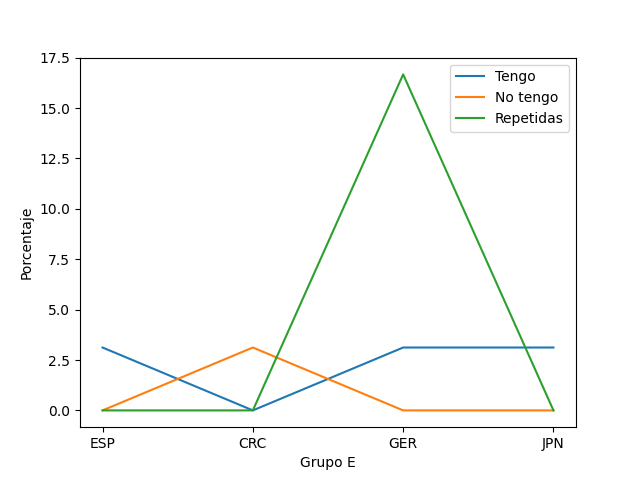

In [120]:
####
#
# Preguntas 9.5 Grupo E
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'E':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_5= pd.DataFrame(data)
print(pregunta9_5)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_5, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_5, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_5, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo E")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  BEL   0.00      3.12      0.00
1  CAN   3.12      0.00     16.67
2  MAR   3.12      0.00      0.00
3  CRO   0.00      3.12      0.00


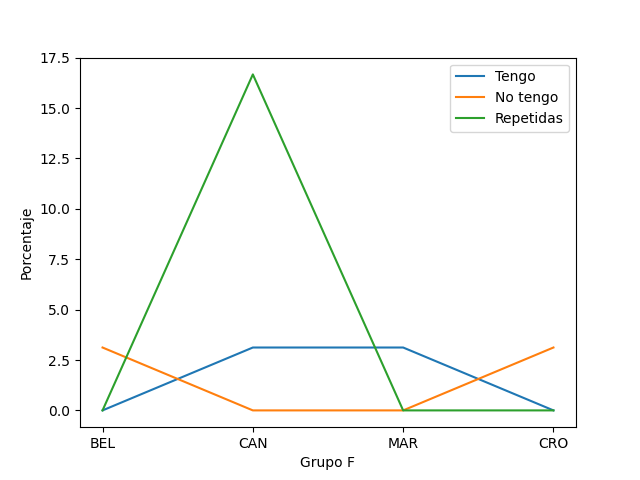

In [122]:
####
#
# Preguntas 9.6 Grupo F
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'F':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_6= pd.DataFrame(data)
print(pregunta9_6)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_6, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_6, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_6, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo F")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  BRA   3.12      0.00     16.67
1  SRB   0.00      3.12      0.00
2  SUI   0.00      3.12      0.00
3  CMR   3.12      0.00      0.00


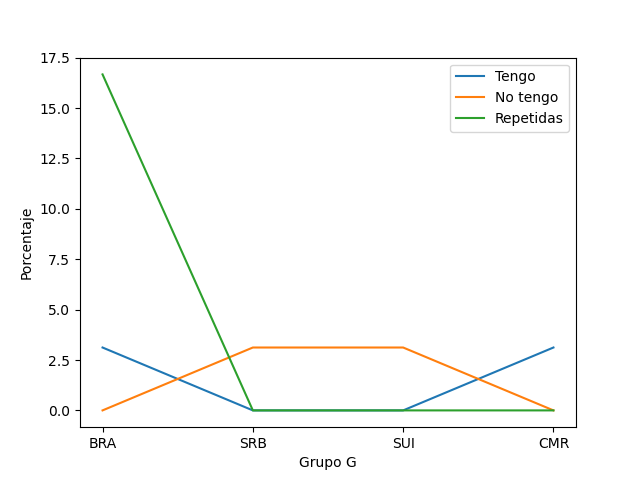

In [124]:
####
#
# Preguntas 9.7 Grupo G
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'G':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_7= pd.DataFrame(data)
print(pregunta9_7)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_7, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_7, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_7, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo G")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

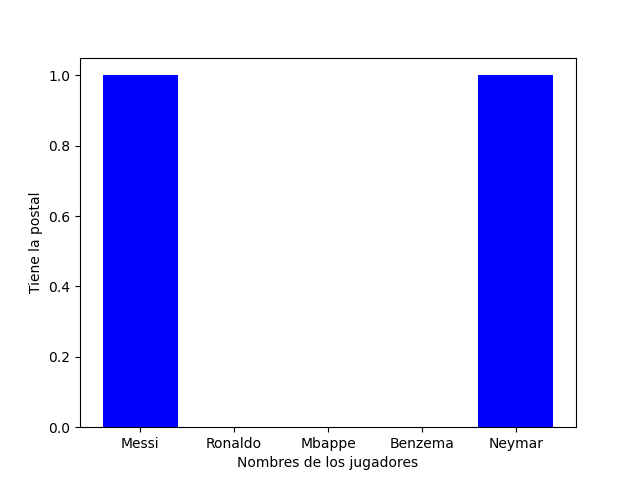

In [125]:
####
#
# Preguntas 10
# ¿Se cuenta con las postales de Leonel Messi, Cristiano Ronaldo, Mbappe, Karim Benzema, Neymar?.

# Lista con los nombres de los jugadores a buscar
jugadoresNombres = ["Messi", "Ronaldo", "Mbappe", "Benzema", "Neymar"] 

# Nuevo dataframe para el gráfico
data = {'Jugadores':jugadoresNombres, 'Tiene':jugadores}
pregunta10 = pd.DataFrame(data)

plt.bar("Jugadores", "Tiene", data = pregunta10, color = "blue")
plt.ylabel("Tiene la postal")
plt.xlabel("Nombres de los jugadores")
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

  País  Tengo  No tengo  Repetida
0  POR   0.00      3.12       0.0
1  GHA   3.12      0.00       0.0
2  URU   0.00      3.12       0.0
3  KOR   3.12      0.00       0.0


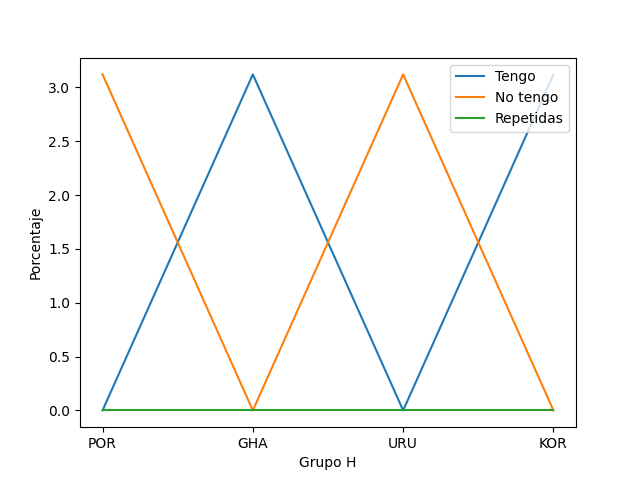

In [126]:
####
#
# Preguntas 9.8 Grupo H
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'H':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_8= pd.DataFrame(data)
print(pregunta9_8)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_8, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_8, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_8, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo H")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()